# Project: Anime recommdendation 

This dataset is taken from https://www.kaggle.com/CooperUnion/anime-recommendations-database?select=anime.csv

## Context
This data set contains information on user preference data from 73,516 users on 12,294 anime. Each user is able to add anime to their completed list and give it a rating and this data set is a compilation of those ratings.

## Content
anime.csv

- anime_id - myanimelist.net's unique id identifying an anime.
- name - full name of anime.
- genre - comma separated list of genres for this anime.
- type - movie, TV, OVA, etc.
- episodes - how many episodes in this show. (1 if movie).
- rating - average rating out of 10 for this anime.
- members - number of community members that are in this anime's "group".

rating.csv

- user_id - non identifiable randomly generated user id.
- anime_id - the anime that this user has rated.
- rating - rating out of 10 this user has assigned (-1 if the user watched it but didn't assign a rating).

## Acknowledgements
Thanks to myanimelist.net API for providing anime data and user ratings.


In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

We have to import necessary libraries and datesets.

In [2]:
import numpy as np
import pandas as pd
import re
import itertools
import collections
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
animes = pd.read_csv('anime.csv') # load the data
animes.head(10)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


In [4]:
animes.shape

(12294, 7)

In [5]:
anime_features = pd.concat([animes["genre"].str.get_dummies(sep=","),
                            pd.get_dummies(animes[["type"]]),
                            animes[["rating"]],animes[["members"]],animes["episodes"]],axis=1)
anime_features.head()

,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,...,Yaoi,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,rating,members,episodes
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,9.37,200630,1
1,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,9.26,793665,64
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,9.25,114262,51
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,9.17,673572,24
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,9.16,151266,51


In [6]:
animes['genre'] = animes['genre'].fillna('None') # filling 'empty' data
animes['genre'] = animes['genre'].apply(lambda x: x.split(', ')) # split genre into list of individual genre
#animes["genre"].str.get_dummies(sep=",")

In [7]:
animes.genre

0                   [Drama, Romance, School, Supernatural]
1        [Action, Adventure, Drama, Fantasy, Magic, Mil...
2        [Action, Comedy, Historical, Parody, Samurai, ...
3                                       [Sci-Fi, Thriller]
4        [Action, Comedy, Historical, Parody, Samurai, ...
                               ...                        
12289                                             [Hentai]
12290                                             [Hentai]
12291                                             [Hentai]
12292                                             [Hentai]
12293                                             [Hentai]
Name: genre, Length: 12294, dtype: object

### Number of animes according to genres

Counter({'Comedy': 4645, 'Action': 2845, 'Adventure': 2348, 'Fantasy': 2309, 'Sci-Fi': 2070, 'Drama': 2016, 'Shounen': 1712, 'Kids': 1609, 'Romance': 1464, 'School': 1220, 'Slice of Life': 1220, 'Hentai': 1141, 'Supernatural': 1037, 'Mecha': 944, 'Music': 860, 'Historical': 806, 'Magic': 778, 'Ecchi': 637, 'Shoujo': 603, 'Seinen': 547, 'Sports': 543, 'Mystery': 495, 'Super Power': 465, 'Military': 426, 'Parody': 408, 'Space': 381, 'Horror': 369, 'Harem': 317, 'Demons': 294, 'Martial Arts': 265, 'Dementia': 240, 'Psychological': 229, 'Police': 197, 'Game': 181, 'Samurai': 148, 'Vampire': 102, 'Thriller': 87, 'Cars': 72, 'Shounen Ai': 65, 'None': 62, 'Shoujo Ai': 55, 'Josei': 54, 'Yuri': 42, 'Yaoi': 39})
Number of animes according to genres


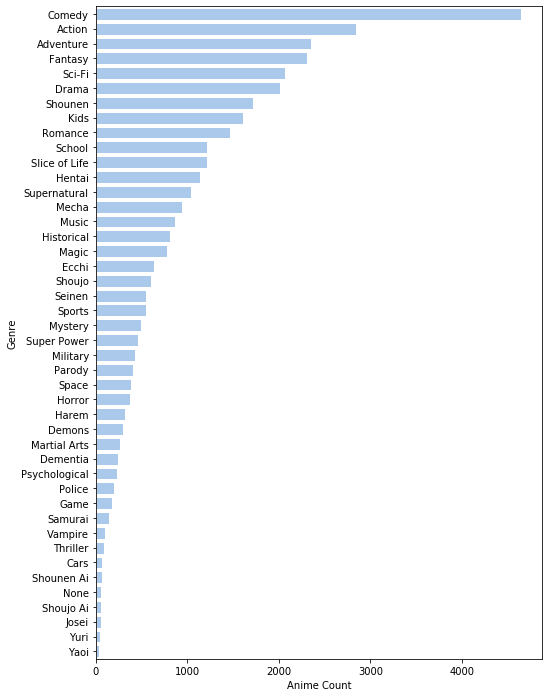

In [8]:
genre_data = itertools.chain(*animes['genre'].values.tolist())# flatten the list
#print(genre_data)
genre_counter = collections.Counter(genre_data)
print(genre_counter)
genres = pd.DataFrame.from_dict(genre_counter, orient='index').reset_index().rename(columns={'index':'genre', 0:'count'})
genres.sort_values('count', ascending=False, inplace=True)

# Plot genre
f, ax = plt.subplots(figsize=(8, 12))
sns.set_color_codes("pastel")
sns.set_style("white")
sns.barplot(x="count", y="genre", data=genres, color='b');
ax.set(ylabel='Genre',xlabel="Anime Count")
print('Number of animes according to genres')

In [9]:
def info_nulls(table):
    info = pd.DataFrame(table.dtypes).T.rename(index={0:'column type'})
    info = info.append(pd.DataFrame(table.isnull().sum()).T.rename(index={0:'number of null values'}))
    info = info.append(pd.DataFrame(table.isnull().sum()/table.shape[0]*100).T.rename(index={0:'percentage of null values'}))
    display(info)

In [10]:
info_nulls(animes)

,anime_id,name,genre,type,episodes,rating,members
column type,int64,object,object,object,object,float64,int64
number of null values,0,0,0,25,0,230,0
percentage of null values,0,0,0,0.203351,0,1.87083,0


In [11]:
animes.loc[(animes['type'] == 'TV') & (animes['episodes'] == 'Unknown'),"episodes"] = 1
animes.loc[(animes['type'] == 'OVA') & (animes['episodes'] == 'Unknown'),"episodes"] = 1
animes.loc[(animes['type'] == 'Movie') & (animes['episodes'] == 'Unknown'),"episodes"] = 1

In [12]:
animes['episodes'] = animes['episodes'].apply(lambda x:np.nan if x=="Unknown" else x)

In [13]:
animes[animes['episodes']=='Unknown']

,anime_id,name,genre,type,episodes,rating,members


In [14]:
animes['episodes'].fillna(animes['episodes'].median(),inplace=True)
animes['rating'].fillna(animes['rating'].mean(),inplace=True)
animes['members'] = animes['members'].astype(float)

In [15]:
info_nulls(animes)

,anime_id,name,genre,type,episodes,rating,members
column type,int64,object,object,object,object,float64,float64
number of null values,0,0,0,25,0,0,0
percentage of null values,0,0,0,0.203351,0,0,0


### Types of animes in the dataset

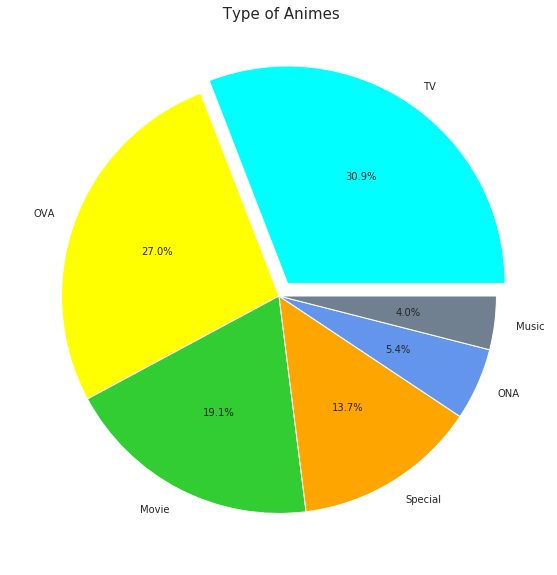

In [16]:
type = pd.DataFrame(animes["type"])
type = type.groupby("type").aggregate({"type": "count"}).rename(columns={'type': 'count', 'index': 'type'})
type = type.sort_values('count', ascending=False).reset_index()

plt.figure(figsize=(10, 10))
explode = [0.07,0,0,0,0,0]
labels = type["type"]
colors = ['aqua', 'yellow', 'limegreen', 'orange', 'cornflowerblue', 'slategray']
plt.pie(type["count"], autopct='%.1f%%', explode=explode, labels=labels, colors=colors)
plt.title(label=" Type of Animes", loc="center", fontsize=15)

plt.show()

### Types of animes vs ratings

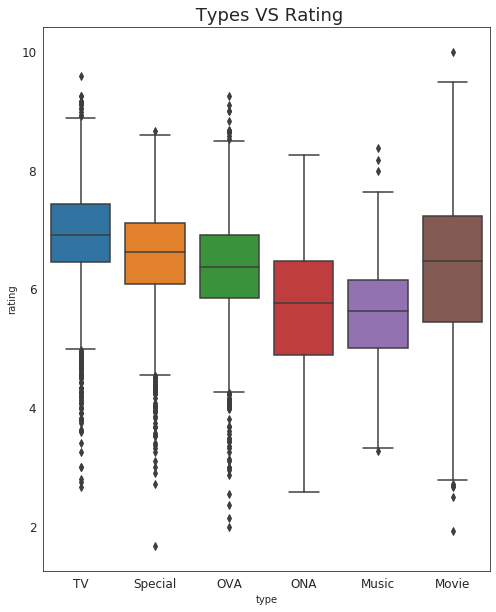

In [17]:
type = pd.DataFrame(animes[["type", "rating"]]).dropna()
type = type.sort_values('type', ascending=False).reset_index()
plt.figure(figsize=(8, 10))
sns.boxplot(x='type', y='rating', data=type)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title(label=" Types VS Rating", loc="center", fontsize=18)

plt.show()

In [18]:
animes["name"] = animes["name"].map(lambda name:re.sub('[^A-Za-z0-9]+', " ", name))
animes['name']

0                                           Kimi no Na wa 
1                          Fullmetal Alchemist Brotherhood
2                                                 Gintama 
3                                              Steins Gate
4                                             Gintama 039 
                               ...                        
12289          Toushindai My Lover Minami tai Mecha Minami
12290                                          Under World
12291                       Violence Gekiga David no Hoshi
12292    Violence Gekiga Shin David no Hoshi Inma Densetsu
12293                       Yasuji no Pornorama Yacchimae 
Name: name, Length: 12294, dtype: object

In [19]:
animes.groupby('name')['rating'].mean().sort_values(ascending=False).head(10)

name
Taka no Tsume 8 Yoshida kun no X Files    10.00
Spoon hime no Swing Kitchen                9.60
Mogura no Motoro                           9.50
Kimi no Na wa                              9.37
Kahei no Umi                               9.33
Fullmetal Alchemist Brotherhood            9.26
Gintama                                    9.25
Yakusoku Africa Mizu to Midori             9.25
Steins Gate                                9.17
Gintama 039                                9.16
Name: rating, dtype: float64

In [20]:
animes.groupby('name')['rating'].count().sort_values(ascending=False).head(10)

name
Shinryaku Ika Musume       3
Seitokai Yakuindomo OVA    2
Hayate no Gotoku           2
Show By Rock               2
K On Ura On                2
K On                       2
Himawari                   2
Saru Kani Gassen           2
Working                    2
Kujibiki Unbalance         2
Name: rating, dtype: int64

Using ratings to find food anime is not a good idea so far.

In [21]:
anime_features

,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,...,Yaoi,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,rating,members,episodes
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,9.37,200630,1
1,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,9.26,793665,64
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,9.25,114262,51
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,9.17,673572,24
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,9.16,151266,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,4.15,211,1
12290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,4.28,183,1
12291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,4.88,219,4
12292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,4.98,175,1


As we have created anime_features which is to be used in machine learning algorithm. To do that, we have to import machine learning libraries and we have to scale that array.

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
mms = MinMaxScaler()

In [24]:
anime_features = mms.fit_transform(anime_features)

ValueError: could not convert string to float: 'Unknown'

This work is not finished. There is much to do with this dataset. Thank you for your kind attention.